<a href="https://colab.research.google.com/github/Gabriel-barbosa-silva/Projeto-para-reducao-de-dimensionalidade-em-imagens./blob/main/Projeto_para_redu%C3%A7%C3%A3o_de_dimensionalidade_em_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto para redução de dimensionalidade em imagens**

Por favor, faça o upload da sua imagem.


Saving cores-vivas.ppm to cores-vivas.ppm


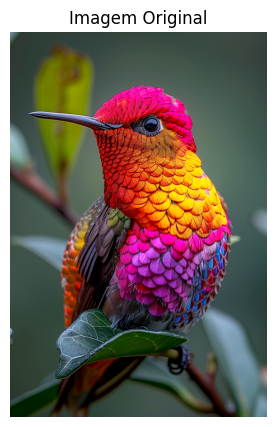

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

# Carregando a imagem
print("Por favor, faça o upload da sua imagem.")
uploaded = files.upload()

# Obtendo o nome do arquivo
file_name = next(iter(uploaded))
image_bytes = uploaded[file_name]

# Criando a imagem a partir dos bytes para visualização inicial
from PIL import Image
image_pil = Image.open(io.BytesIO(image_bytes))

# Exibir a imagem original
plt.figure(figsize=(10, 5))
plt.imshow(image_pil)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Converter a imagem para um array numpy
img_array = np.array(image_pil)

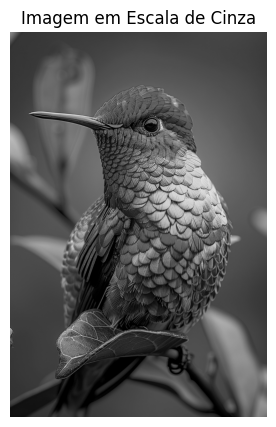

Formato da imagem em escala de cinza: (5000, 3333)
Tipo de dado da imagem em escala de cinza: uint8


In [ ]:
# Verificando se a imagem tem 3 canais (RGB)
if len(img_array.shape) < 3 or img_array.shape[2] != 3:
    print("A imagem já está em escala de cinza ou tem um formato inesperado.")
    gray_img = img_array
else:
    # Conversão para escala de cinza usando a fórmula de ponderação
    R, G, B = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    gray_img = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# Exibir a imagem em escala de cinza
plt.figure(figsize=(10, 5))
plt.imshow(gray_img, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

# Verificando o formato e o tipo de dado da nova imagem
print(f"Formato da imagem em escala de cinza: {gray_img.shape}")
print(f"Tipo de dado da imagem em escala de cinza: {gray_img.dtype}")

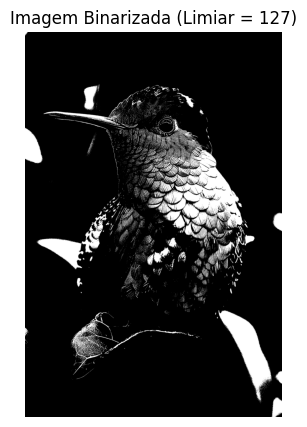

Formato da imagem binarizada: (5000, 3333)
Tipo de dado da imagem binarizada: uint8


In [ ]:
# Definindo o limiar para a binarização
threshold = 127

# Binarizando a imagem
# Se o valor do pixel for menor que o limiar, ele se torna 0
# Caso contrário, ele se torna 255
binary_img = (gray_img >= threshold).astype(np.uint8) * 255

# Exibir a imagem binarizada
plt.figure(figsize=(10, 5))
plt.imshow(binary_img, cmap='gray')
plt.title(f'Imagem Binarizada (Limiar = {threshold})')
plt.axis('off')
plt.show()

# Verificando o formato e o tipo de dado da nova imagem
print(f"Formato da imagem binarizada: {binary_img.shape}")
print(f"Tipo de dado da imagem binarizada: {binary_img.dtype}")

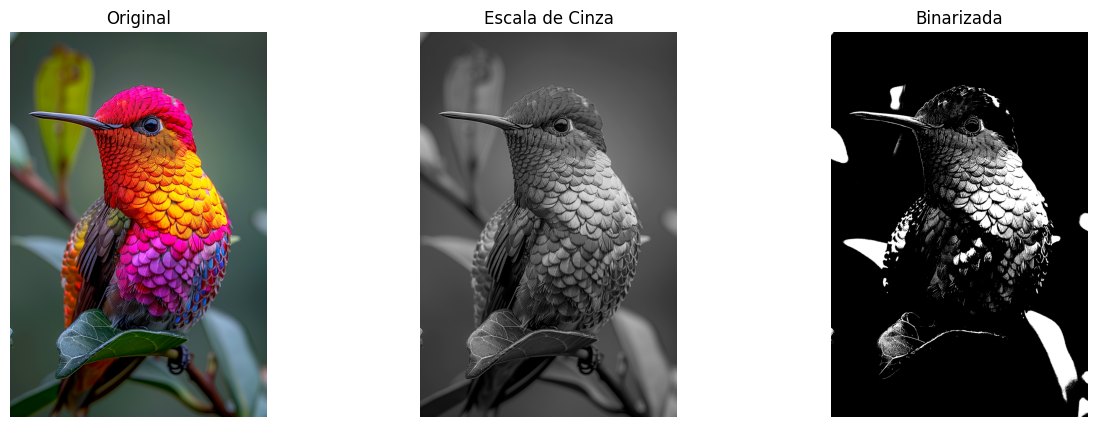

In [ ]:
# Exibir todas as imagens lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Imagem Original
axs[0].imshow(img_array)
axs[0].set_title('Original')
axs[0].axis('off')

# Imagem em Escala de Cinza
axs[1].imshow(gray_img, cmap='gray')
axs[1].set_title('Escala de Cinza')
axs[1].axis('off')

# Imagem Binarizada
axs[2].imshow(binary_img, cmap='gray')
axs[2].set_title('Binarizada')
axs[2].axis('off')

plt.show()